In [71]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.decomposition import PCA


In [73]:
# Load the dataset
df = pd.read_csv('breast-cancer (1).csv')

In [75]:
# Encode categorical columns
for col in df.columns:
    if df[col].dtype == 'object':
        le = LabelEncoder()
        df[col] = le.fit_transform(df[col])

In [77]:
# Fill missing values
df.fillna(df.mean(), inplace=True)

In [79]:
# Normalize the data
scaler = StandardScaler()
scaled_data = scaler.fit_transform(df)

In [81]:
# KMeans parameters
k = 2
max_iter = 100
tol = 1e-4


In [83]:
# Initialize centroids randomly
rng = np.random.RandomState(42)
initial_idx = rng.permutation(len(scaled_data))[:k]
centroids = scaled_data[initial_idx]


In [87]:
# For tracking per iteration
iteration_sizes = []


In [89]:
# Initialize centroids randomly
rng = np.random.RandomState(42)
initial_idx = rng.permutation(len(scaled_data))[:k]
centroids = scaled_data[initial_idx]

In [91]:
# For tracking per iteration
iteration_sizes = []

for i in range(max_iter):
    # Assign labels based on closest centroid
    distances = np.linalg.norm(scaled_data[:, np.newaxis] - centroids, axis=2)
    labels = np.argmin(distances, axis=1)

    # Count points per cluster
    unique, counts = np.unique(labels, return_counts=True)
    count_dict = {int(k): int(v) for k, v in zip(unique, counts)}
    iteration_sizes.append(count_dict)

    # Recompute centroids
    new_centroids = np.array([scaled_data[labels == j].mean(axis=0) for j in range(k)])

    # Check for convergence
    if np.allclose(centroids, new_centroids, atol=tol):
        break

    centroids = new_centroids

In [93]:

# Final cluster labels
df['Cluster'] = labels

In [95]:
# Output final counts
print("Final data point counts per cluster:")
print(df['Cluster'].value_counts().sort_index())

# Output iteration tracking
print("\nCluster sizes per iteration:")
for idx, counts in enumerate(iteration_sizes, 1):
    print(f"Iteration {idx}: {counts}")


Final data point counts per cluster:
Cluster
0    128
1    144
Name: count, dtype: int64

Cluster sizes per iteration:
Iteration 1: {0: 74, 1: 198}
Iteration 2: {0: 101, 1: 171}
Iteration 3: {0: 116, 1: 156}
Iteration 4: {0: 127, 1: 145}
Iteration 5: {0: 128, 1: 144}
Iteration 6: {0: 128, 1: 144}


In [97]:
# Compare with original labels (if available) and print "Yes" or "No"
print("Yes" if 'Class' in df.columns and np.array_equal(df['Class'], df['Cluster']) else "No")

No


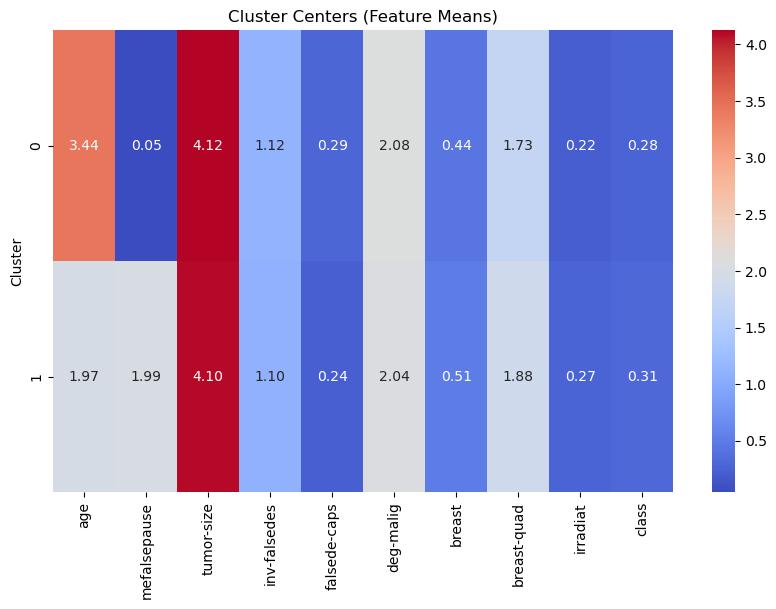

In [112]:
# Calculate cluster centers in original scale
cluster_means = pd.DataFrame(df.groupby('Cluster').mean())

# Heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(cluster_means, annot=True, fmt='.2f', cmap='coolwarm')
plt.title('Cluster Centers (Feature Means)')
plt.show()